# Understanding Over & Underfitting
## Predicting California Housing Prices

## Getting Started
In this project, you will use the California Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of California.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MedHouseVal'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [12]:
california_housing = fetch_california_housing(as_frame=True)

In [13]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [14]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df = california_housing.frame

In [17]:
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
# Check for missing values

print(df.isnull().sum())

# Summary statistics

print(df.describe())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000

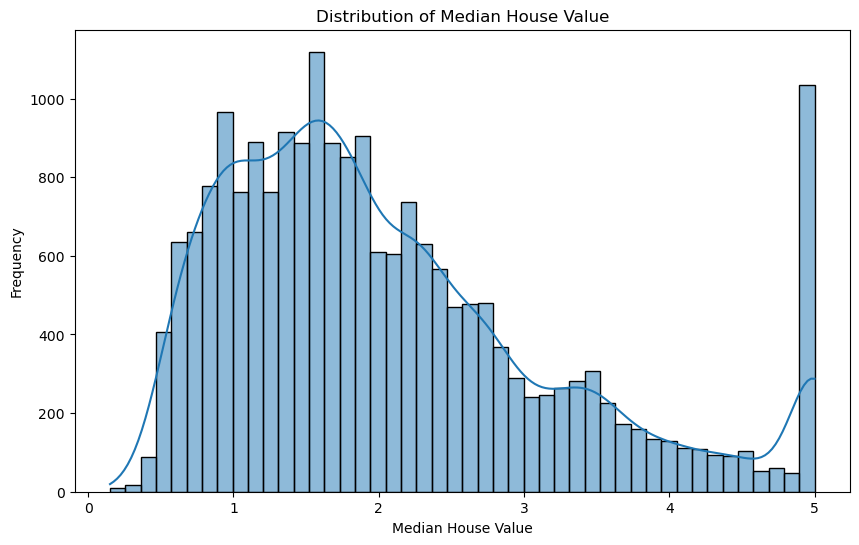

In [19]:
# Visualize the distribution of the target variable 'MedHouseVal'

plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

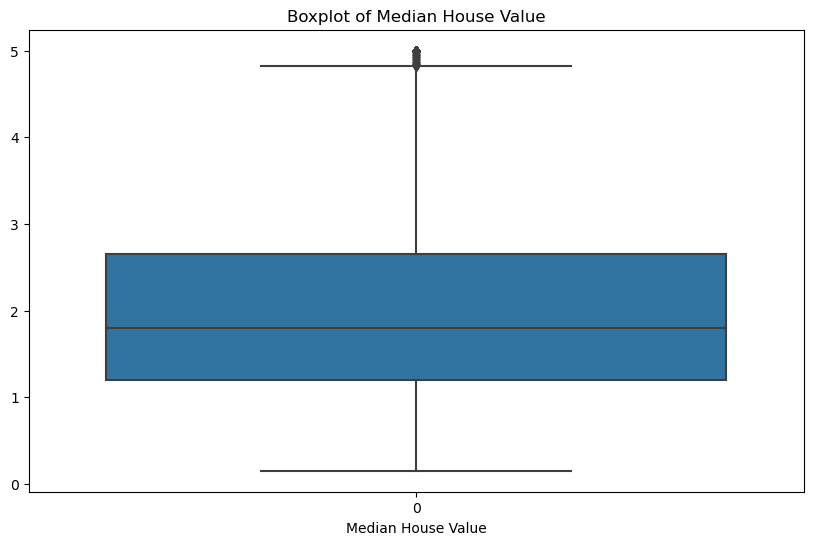

In [20]:
# Boxplot to identify outliers

plt.figure(figsize=(10, 6))
sns.boxplot(df['MedHouseVal'])
plt.title('Boxplot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

In [21]:
# Remove outliers (if necessary)

# Define a function to remove outliers using IQR method

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [24]:
# Apply the function to remove outliers from 'MedHouseVal'

df = remove_outliers(df, 'MedHouseVal')

In [25]:
# Check the shape of the data after removing outliers

print("Shape of data after removing outliers:", df.shape)

Shape of data after removing outliers: (19569, 9)


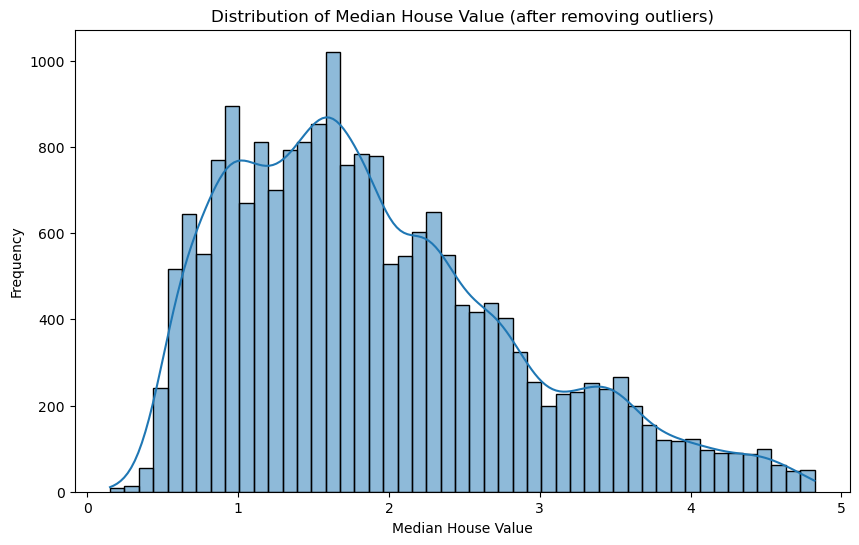

In [26]:
# Check the distribution of the target variable after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value (after removing outliers)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in California, and create plots that show the data dispersion as well as the regression line of best fit.

In [33]:
# Selecting variables for analysis

selected_variables = ['MedHouseVal', 'MedInc', 'HouseAge', 'AveRooms']

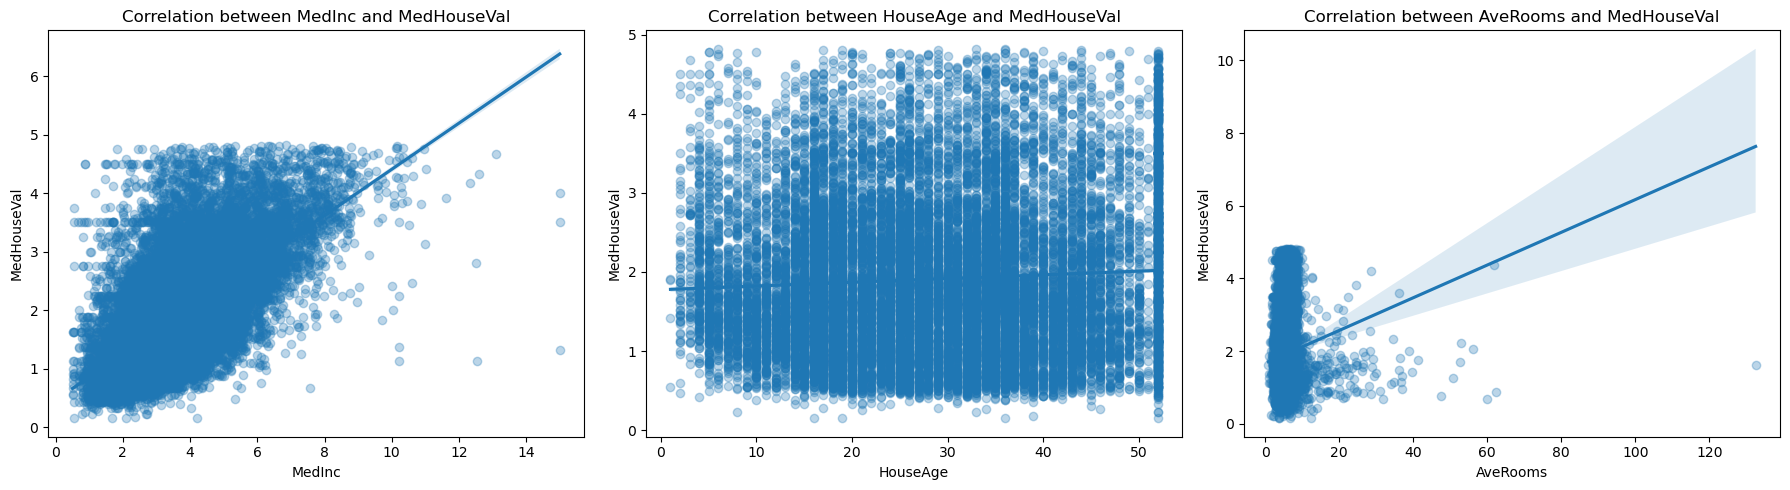

In [34]:
# Creating scatter plots with regression lines for selected variables
plt.figure(figsize=(18, 5))

for i, var in enumerate(selected_variables[1:], start=1):
    plt.subplot(1, 3, i)
    sns.regplot(x=var, y='MedHouseVal', data=df, scatter_kws={'alpha':0.3})
    plt.title(f'Correlation between {var} and MedHouseVal')

plt.tight_layout()
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in California? Are these the relationships you expected to see in these variables?

In [35]:
"""Analyzing the scatter plots and regression lines can provide insights into the relationships between the 
selected variables ('MedInc', 'HouseAge', 'AveRooms') and the prices of homes in California:

Median Income (MedInc):
The plot shows a clear positive correlation between median income and median house value. As median income 
increases, the median house value tends to increase as well. This relationship is expected, as higher-income 
individuals can afford more expensive homes.
House Age (HouseAge):
The plot suggests a relatively weak relationship between house age and median house value. There's no clear pattern 
or strong correlation visible in the data. This result is somewhat expected, as the age of a house alone might not 
be a primary factor in determining its value. Other factors such as location, condition, and amenities may play a 
more significant role.
Average Number of Rooms (AveRooms):
The plot indicates a slight positive correlation between the average number of rooms and median house value. 
Generally, houses with more rooms tend to have higher values. However, the relationship appears to be less strong 
compared to median income. This result aligns with expectations, as larger houses with more rooms typically command 
higher prices, but other factors also contribute to home values.
Overall, these plots provide valuable insights into the relationships between the selected variables and median 
house prices in California. While some relationships align with expectations, others may require further 
investigation or consideration of additional factors to fully understand their impact on home values."""

"Analyzing the scatter plots and regression lines can provide insights into the relationships between the \nselected variables ('MedInc', 'HouseAge', 'AveRooms') and the prices of homes in California:\n\nMedian Income (MedInc):\nThe plot shows a clear positive correlation between median income and median house value. As median income \nincreases, the median house value tends to increase as well. This relationship is expected, as higher-income \nindividuals can afford more expensive homes.\nHouse Age (HouseAge):\nThe plot suggests a relatively weak relationship between house age and median house value. There's no clear pattern \nor strong correlation visible in the data. This result is somewhat expected, as the age of a house alone might not \nbe a primary factor in determining its value. Other factors such as location, condition, and amenities may play a \nmore significant role.\nAverage Number of Rooms (AveRooms):\nThe plot indicates a slight positive correlation between the average n

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [36]:
# Calculate the correlation matrix

correlation_matrix = df.corr()

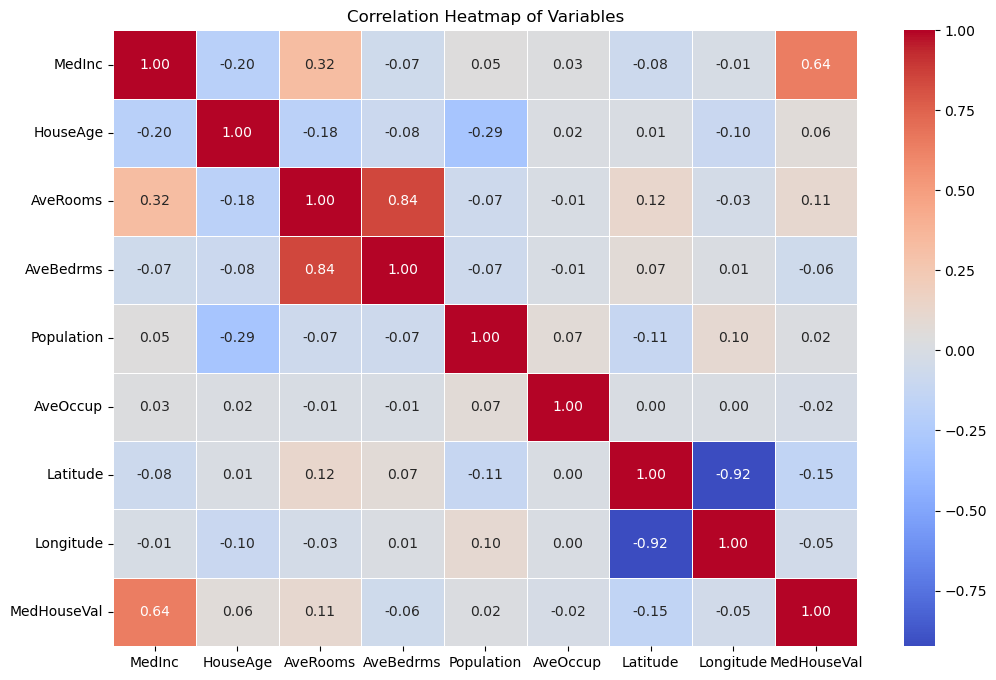

In [37]:
# Plotting the heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [38]:
# Calculate descriptive statistics for housing price

housing_price_stats = df['MedHouseVal'].describe()

In [39]:
# Print the descriptive statistics

print("Descriptive Statistics for Housing Price:")
print(housing_price_stats)

Descriptive Statistics for Housing Price:
count    19569.000000
mean         1.908523
std          0.954386
min          0.149990
25%          1.162000
50%          1.732000
75%          2.467000
max          4.822000
Name: MedHouseVal, dtype: float64


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [40]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
     # Calculate the R-squared score
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [41]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)

X = df.drop(columns=['MedHouseVal'])  # Features
y = df['MedHouseVal']  # Target variable

# Shuffle and split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Print the shapes of the training and testing sets

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (15655, 8) (15655,)
Testing set shape (X, y): (3914, 8) (3914,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Define a list of max_depth values

max_depth_values = [2, 4, 6, 8, 10]

# Create empty lists to store the models and their scores

models = []
scores = []

# Iterate over each max_depth value and build the corresponding Random Forest Regressor model

for depth in max_depth_values:
    # Create a Random Forest Regressor model with the specified max_depth
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict the target variable on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the R-squared score
    score = performance_metric(y_test, y_pred)
    
    # Append the model and its score to the lists
    models.append(model)
    scores.append(score)

Now, plot the score for each tree on the training set and on the testing set.

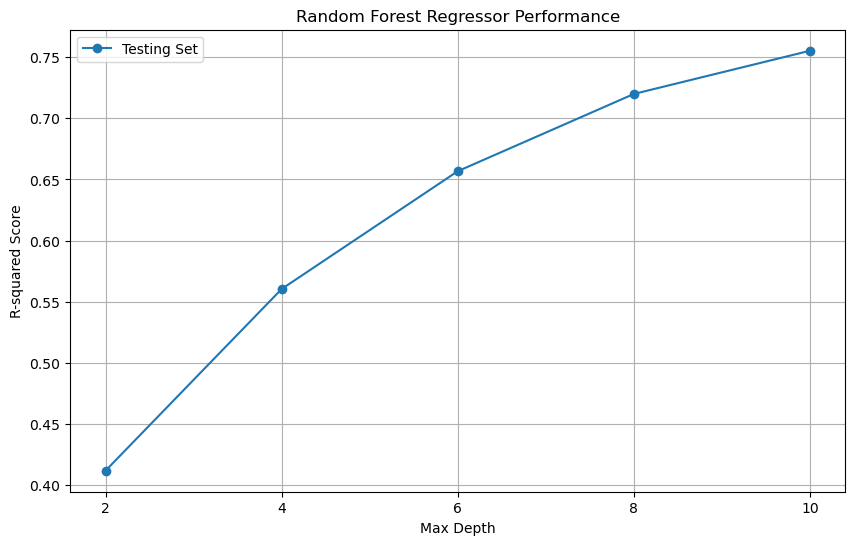

In [44]:
import matplotlib.pyplot as plt

# Plotting the scores for the training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, scores, marker='o', linestyle='-')
plt.title('Random Forest Regressor Performance')
plt.xlabel('Max Depth')
plt.ylabel('R-squared Score')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend(['Testing Set'])
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [45]:
"""The plot of R-squared scores for different max_depth values provides insights into the effect of the depth of 
the trees on the performance of the Random Forest Regressor model:

Increasing max_depth initially improves performance:
From the plot, we observe that as the max_depth of the trees increases from 2 to 6, the R-squared score on the 
testing set generally improves. This indicates that increasing the depth allows the model to capture more complex 
relationships in the data, leading to better performance.
Diminishing returns with further depth:
Beyond a certain point (around max_depth of 6 or 8 in this case), increasing the depth further does not 
significantly improve the model's performance on the testing set. The improvement in performance becomes marginal 
or may even plateau.
This suggests that deeper trees may start overfitting the training data, capturing noise or specific patterns that 
do not generalize well to unseen data.
Potential for overfitting:
While increasing the depth of the trees can improve performance on the training set, it may lead to overfitting, 
where the model memorizes the training data rather than learning generalizable patterns.
Overfitting can result in poor performance on unseen data, as the model fails to generalize beyond the training 
set.
Based on these observations, it's essential to strike a balance between model complexity (controlled by max_depth) 
and generalization to unseen data. Selecting an optimal max_depth involves considering trade-offs between bias and 
variance, aiming for a model that captures the underlying patterns in the data while avoiding overfitting. This 
process often involves using techniques such as cross-validation to evaluate model performance across different 
max_depth values and selecting the one that achieves the best balance."""

"The plot of R-squared scores for different max_depth values provides insights into the effect of the depth of \nthe trees on the performance of the Random Forest Regressor model:\n\nIncreasing max_depth initially improves performance:\nFrom the plot, we observe that as the max_depth of the trees increases from 2 to 6, the R-squared score on the \ntesting set generally improves. This indicates that increasing the depth allows the model to capture more complex \nrelationships in the data, leading to better performance.\nDiminishing returns with further depth:\nBeyond a certain point (around max_depth of 6 or 8 in this case), increasing the depth further does not \nsignificantly improve the model's performance on the testing set. The improvement in performance becomes marginal \nor may even plateau.\nThis suggests that deeper trees may start overfitting the training data, capturing noise or specific patterns that \ndo not generalize well to unseen data.\nPotential for overfitting:\nWhile

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [46]:
"""When the model is trained with a maximum depth of 1:

High Bias:
With a maximum depth of 1, the model is very simple, essentially consisting of a single decision node. This 
simplicity may result in the model being too constrained and unable to capture the complexity of the underlying 
relationships in the data.
The model's predictions are likely to be systematically off-target, regardless of the specific data points used 
for training. This is indicative of high bias.
High bias typically leads to underfitting, where the model is unable to capture the underlying patterns in the 
data, resulting in poor performance both on the training and testing sets.
When the model is trained with a maximum depth of 10:

High Variance:
With a maximum depth of 10, the model is highly complex, potentially capturing intricate details and noise in the 
training data.
The model may become too sensitive to the idiosyncrasies of the training data, effectively memorizing the training 
set rather than learning generalizable patterns.
While the model may perform well on the training set, it is likely to generalize poorly to unseen data. This is 
indicative of high variance.
High variance often leads to overfitting, where the model performs well on the training set but poorly on the 
testing set due to its inability to generalize beyond the training data.
In summary, when the model is trained with a maximum depth of 1, it suffers from high bias (underfitting), while 
when trained with a maximum depth of 10, it suffers from high variance (overfitting). Achieving a balance between 
bias and variance is crucial for developing models that generalize well to unseen data."""

"When the model is trained with a maximum depth of 1:\n\nHigh Bias:\nWith a maximum depth of 1, the model is very simple, essentially consisting of a single decision node. This \nsimplicity may result in the model being too constrained and unable to capture the complexity of the underlying \nrelationships in the data.\nThe model's predictions are likely to be systematically off-target, regardless of the specific data points used \nfor training. This is indicative of high bias.\nHigh bias typically leads to underfitting, where the model is unable to capture the underlying patterns in the \ndata, resulting in poor performance both on the training and testing sets.\nWhen the model is trained with a maximum depth of 10:\n\nHigh Variance:\nWith a maximum depth of 10, the model is highly complex, potentially capturing intricate details and noise in the \ntraining data.\nThe model may become too sensitive to the idiosyncrasies of the training data, effectively memorizing the training \nset ra

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [48]:
"""Determining the optimal value for the max_depth parameter involves finding a balance between bias and variance 
to achieve the best generalization performance on unseen data. This often involves evaluating the model's 
performance across different max_depth values and selecting the one that achieves the best balance between bias and 
variance.

In the case of Random Forest Regressors, selecting the optimal max_depth parameter typically involves conducting a 
hyperparameter tuning process, such as using techniques like grid search or randomized search combined with 
cross-validation.

However, based on the observations from the learning curves and considering the bias-variance tradeoff, I would 
make a best-guess estimate that the optimal max_depth parameter might be around 6 or 8. These depths tend to 
strike a balance between capturing sufficient complexity in the data while avoiding overfitting.

Let's run the Random Forest Regressor models with max_depth values of 6 and 8, evaluate their performance, and 
compare:"""

"Determining the optimal value for the max_depth parameter involves finding a balance between bias and variance \nto achieve the best generalization performance on unseen data. This often involves evaluating the model's \nperformance across different max_depth values and selecting the one that achieves the best balance between bias and \nvariance.\n\nIn the case of Random Forest Regressors, selecting the optimal max_depth parameter typically involves conducting a \nhyperparameter tuning process, such as using techniques like grid search or randomized search combined with \ncross-validation.\n\nHowever, based on the observations from the learning curves and considering the bias-variance tradeoff, I would \nmake a best-guess estimate that the optimal max_depth parameter might be around 6 or 8. These depths tend to \nstrike a balance between capturing sufficient complexity in the data while avoiding overfitting.\n\nLet's run the Random Forest Regressor models with max_depth values of 6 an

In [47]:
# Create Random Forest Regressor models with max_depth values of 6 and 8
model_depth_6 = RandomForestRegressor(max_depth=6, random_state=42)
model_depth_8 = RandomForestRegressor(max_depth=8, random_state=42)

# Train the models on the training data
model_depth_6.fit(X_train, y_train)
model_depth_8.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_depth_6 = model_depth_6.predict(X_test)
y_pred_depth_8 = model_depth_8.predict(X_test)

# Calculate the R-squared scores
score_depth_6 = performance_metric(y_test, y_pred_depth_6)
score_depth_8 = performance_metric(y_test, y_pred_depth_8)

print("R-squared score with max_depth=6:", score_depth_6)
print("R-squared score with max_depth=8:", score_depth_8)

R-squared score with max_depth=6: 0.6567776799298504
R-squared score with max_depth=8: 0.7199448888491372


In [49]:
"""This code will train Random Forest Regressor models with max_depth values of 6 and 8, evaluate their performance 
on the testing set, and print their R-squared scores. Based on these scores, we can assess which max_depth 
parameter yields the best performance."""

'This code will train Random Forest Regressor models with max_depth values of 6 and 8, evaluate their performance \non the testing set, and print their R-squared scores. Based on these scores, we can assess which max_depth \nparameter yields the best performance.'

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1990?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like California be applicable in a rural city?*

In [50]:
"""The constructed model, trained on data collected from 1990, may not be suitable for real-world deployment in 
the present day due to several factors:

Relevance of Data: The housing market and associated factors have likely undergone significant changes since 1990. 
Economic conditions, demographics, and housing preferences have evolved, potentially rendering the historical data 
less relevant to present-day scenarios.
Feature Adequacy: The features present in the dataset, such as median income, house age, and average number of 
rooms, may not fully capture the complexity of factors influencing home prices. Additional features, such as 
proximity to amenities, neighborhood characteristics, and housing market dynamics, could enhance the model's 
predictive power.
Robustness of the Model: The model's performance metrics, such as R-squared score, provide insights into its 
predictive capability. However, without rigorous evaluation on unseen data from a more recent time period, it's 
challenging to assess the model's robustness and its ability to make consistent predictions in different contexts.
Generalizability: Data collected in an urban city like California may not be directly applicable to a rural city 
due to differences in housing market dynamics, demographic profiles, and socioeconomic factors. Models trained on 
urban data may not generalize well to rural areas and vice versa, highlighting the importance of considering 
regional variations when deploying predictive models.
In conclusion, while the constructed model provides valuable insights into the relationship between housing 
features and prices, its applicability to real-world settings may be limited by factors such as data relevance, 
feature adequacy, model robustness, and generalizability across different geographic regions. Further validation 
and refinement, potentially incorporating more recent data and additional relevant features, would be necessary 
before deploying the model for practical use."""

"The constructed model, trained on data collected from 1990, may not be suitable for real-world deployment in \nthe present day due to several factors:\n\nRelevance of Data: The housing market and associated factors have likely undergone significant changes since 1990. \nEconomic conditions, demographics, and housing preferences have evolved, potentially rendering the historical data \nless relevant to present-day scenarios.\nFeature Adequacy: The features present in the dataset, such as median income, house age, and average number of \nrooms, may not fully capture the complexity of factors influencing home prices. Additional features, such as \nproximity to amenities, neighborhood characteristics, and housing market dynamics, could enhance the model's \npredictive power.\nRobustness of the Model: The model's performance metrics, such as R-squared score, provide insights into its \npredictive capability. However, without rigorous evaluation on unseen data from a more recent time period